In [50]:
# Car price prediction 

import pandas as pd 
import numpy as np


In [51]:
data = pd.read_csv(r"F:\M.Tech_CollgeMaterials\IronCode\CarPricePrediction\dataset\car_price_dataset.csv")

In [52]:
data.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [53]:
data.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [54]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [55]:
data = data.drop(['Transmission'],axis=1)

In [56]:
data.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,107724,2,5,6545


In [57]:
print(data['Brand'].unique())

['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']


In [58]:
print(data['Brand'].value_counts().sort_values(ascending=False))


Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64


In [59]:
data['Car Age'] = 2025 - data['Year']  # Taking the current year as 2025 for car age calc.


In [60]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Mileage,Doors,Owner_Count,Price,Car Age
0,Kia,Rio,2020,4.2,Diesel,289944,3,5,8501,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,5356,2,3,12092,13
2,Mercedes,GLA,2020,4.2,Diesel,231440,4,2,11171,5
3,Audi,Q5,2023,2.0,Electric,160971,2,1,11780,2
4,Volkswagen,Golf,2003,2.6,Hybrid,286618,3,3,2867,22


In [61]:
data = data.drop(['Model'],axis=1)

In [62]:
data.head()


,Brand,Year,Engine_Size,Fuel_Type,Mileage,Doors,Owner_Count,Price,Car Age
0,Kia,2020,4.2,Diesel,289944,3,5,8501,5
1,Chevrolet,2012,2.0,Hybrid,5356,2,3,12092,13
2,Mercedes,2020,4.2,Diesel,231440,4,2,11171,5
3,Audi,2023,2.0,Electric,160971,2,1,11780,2
4,Volkswagen,2003,2.6,Hybrid,286618,3,3,2867,22


In [63]:
brand_mapping = {
    'Kia': 1,
    'Chevrolet': 2,
    'Mercedes': 3,
    'Audi': 4,
    'Volkswagen': 5,
    'Toyota': 6,
    'Honda': 7,
    'BMW': 8,
    'Hyundai': 9,
    'Ford': 10
}

data['Brand'] = data['Brand'].map(brand_mapping)


In [64]:
fuel_mapping = {
    'Petrol': 1,
    'Diesel': 2,
    'Electric': 3,
    'Hybrid': 4
}

data['Fuel_Type'] = data['Fuel_Type'].map(fuel_mapping)


In [65]:
data.head()

,Brand,Year,Engine_Size,Fuel_Type,Mileage,Doors,Owner_Count,Price,Car Age
0,1,2020,4.2,2,289944,3,5,8501,5
1,2,2012,2.0,4,5356,2,3,12092,13
2,3,2020,4.2,2,231440,4,2,11171,5
3,4,2023,2.0,3,160971,2,1,11780,2
4,5,2003,2.6,4,286618,3,3,2867,22


In [66]:
data.dtypes

Brand            int64
Year             int64
Engine_Size    float64
Fuel_Type        int64
Mileage          int64
Doors            int64
Owner_Count      int64
Price            int64
Car Age          int64
dtype: object

In [67]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)




In [69]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Final Evaluation of the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 1243778.5105
Mean Absolute Error: 884.3705
R-squared: 0.8646273420723769


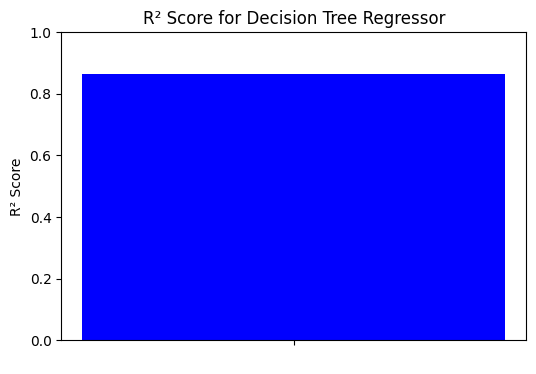

R² Score for Decision Tree Regressor: 0.8646273420723769


In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculating  the R² score
r2 = r2_score(y_test, y_pred)

# Plotting the R² score
plt.figure(figsize=(6, 4))
plt.bar([' '], [r2], color='blue')
plt.title('R² Score for Decision Tree Regressor')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # R² score ranges from 0 to 1
plt.show()

print("R² Score for Decision Tree Regressor:", r2)
